# Goals
The aim is to recreate FE versions of the test problems form the BICGStab paper and export them as mtx files.

## Set Up
This is assembled from the Gridap tutorials.  It is set up to be as understandable as possible.  

In [3]:
using Gridap, LinearAlgebra, LimitedLDLFactorizations, Preconditioners

n = 8; Omega = (0.0,1.0,0.0,1.0);
Grid = CartesianDiscreteModel(Omega, (n,n))
# Grid has 4 corners and 4 edges
# "boundary" is all elements of the boundary of Omega
# Tags 1-4 are the corners and Tags 5-8 are the edges.
# Label each of the six sides differently
# boundary
Tags = get_face_labeling(Grid)
add_tag_from_tags!(Tags,"y=0",[1,2,5])
add_tag_from_tags!(Tags,"OtherEdges",[3,4,6,7,8])
# Piecewise linear Lagrange elements
order = 1; Elements = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(Grid,Elements;conformity=:H1,dirichlet_tags="y=0")
# Incorporating Homogeneous Dirichlet boundary conditions.
g(x) = 0.0
U = TrialFESpace(V,g)
# Triangulating and defining measures
degree = 2
Ω = Triangulation(Grid)
dΩ = Measure(Ω,degree)
# Setting up boundary triangulation/measure for Neumann conditions 
Γ = BoundaryTriangulation(Grid,tags="OtherEdges")
dΓ = Measure(Γ,degree)
# Setting up a simple test problem
f(x) = 1.0; h(x) = 3.0
a(u,v) = ∫( ∇(v)⋅∇(u) )*dΩ
b(v) = ∫( v*f )*dΩ + ∫( v*h )*dΓ
# Set up FE operator
op = AffineFEOperator(a,b,U,V)
# Extract Stiffness Matrix A
A=get_matrix(op)
# Compute Incomplete Cholesky Decomposition
(L,d,alpha) = lldl(A)

LoadError: MethodError: no method matching iterate(::LimitedLDLFactorization{Float64, Int64})
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at range.jl:664
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Int64[39m) at range.jl:664
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{var"#s77", var"#s76"} where {var"#s77", var"#s76"<:Dict}, Base.ValueIterator{var"#s75"} where var"#s75"<:Dict} at dict.jl:693
[0m  ...

In [2]:
alpha

LoadError: UndefVarError: alpha not defined

# Problem 1
$-\Delta u$
All Homogeneous Dirichlet condiutions

In [5]:
using Gridap, LinearAlgebra, LimitedLDLFactorizations

n = 8; Omega = (0.0,1.0,0.0,1.0);
Grid = CartesianDiscreteModel(Omega, (n,n))
# Grid has 4 corners and 4 edges
# "boundary" is all elements of the boundary of Omega
# Tags 1-4 are the corners and Tags 5-8 are the edges.
# Label each of the six sides differently
# boundary
Tags = get_face_labeling(Grid)
add_tag_from_tags!(Tags,"y=0",[1,2,5])
add_tag_from_tags!(Tags,"OtherEdges",[3,4,6,7,8])
# Piecewise linear Lagrange elements
order = 1; Elements = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(Grid,Elements;conformity=:H1,dirichlet_tags="boundary")
# Incorporating Homogeneous Dirichlet boundary conditions.
g(x) = 0.0
U = TrialFESpace(V,g)
# Triangulating and defining measures
degree = 2
Ω = Triangulation(Grid)
dΩ = Measure(Ω,degree)
# Setting up boundary triangulation/measure for Neumann conditions 
Γ = BoundaryTriangulation(Grid,tags="OtherEdges")
dΓ = Measure(Γ,degree)
# Setting up a simple test problem
f(x) = 1.0; h(x) = 3.0
a(u,v) = ∫( ∇(v)⋅∇(u) )*dΩ
b(v) = ∫( v*f )*dΩ + ∫( v*h )*dΓ
# Set up FE operator
op = AffineFEOperator(a,b,U,V)
# Extract Stiffness Matrix A
A1 = get_matrix(op)
# Export Symmetric Matrix
norm(A1-A1')
# Export Incomplete Cholesky Factors

0.0

In [10]:
using LimitedLDLFactorizations, Plots
hmm = lldl(A1,1:49; droptol=0.0);
L=hmm.L; L=L+I
d=hmm.D;
alpha=hmm.α
spy(A1-L*diagm(d)*L')
alpha
norm(A1-L*diagm(d)*L')

0.6978351888452217

In [21]:
using Preconditioners, Plots
hmm = CholeskyPreconditioner(A1,1)
hmm.ldlt
fieldnames(LimitedLDLFactorization)
hmm.ldlt.P

49-element Vector{Int64}:
 49
 48
 47
 35
 29
 43
 44
 45
 36
 37
 38
 30
 31
  ⋮
 25
 26
 28
 27
 32
 33
 34
 39
 40
 41
 46
 42

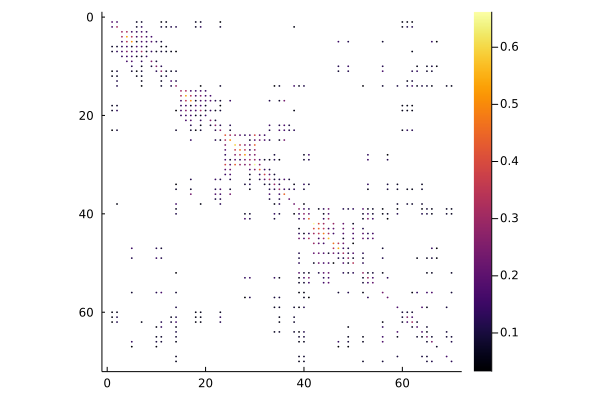

In [67]:
 spy(L'*diagm(d)*L)

In [56]:
A[p,p]-L*diagm(d)*L'

72×72 Matrix{Float64}:
  2.66667   -0.333333   0.0       …   0.0         0.0        -0.333333
 -0.333333   2.625      0.0           0.0         0.0        -0.375
  0.0        0.0        1.33333       0.0         0.0         0.0
  0.0        0.0       -0.166667      0.0         0.0         0.0
  0.0        0.0        0.0           0.0         0.0         0.0
  0.0        0.0        0.0       …   0.0         0.0         0.0
  0.0        0.0        0.0           0.0         0.0         0.0
  0.0        0.0       -0.333333      0.0         0.0         0.0
  0.0        0.0       -0.333333      0.0         0.0         0.0
  0.0        0.0        0.0           0.0         0.0         0.0
  0.0        0.0        0.0       …   0.0         0.0         0.0
 -0.333333  -0.375      0.0           0.0         0.0        -0.0952381
 -0.333333  -0.375      0.0           0.0         0.0        -0.0952381
  ⋮                               ⋱               ⋮          
  0.0       -0.333333   0.0       …  -

In [21]:
using Preconditioners, Plots
P = CholeskyPreconditioner(A, 0)
fieldnames(P)

LoadError: MethodError: no method matching fieldnames(::CholeskyPreconditioner{LimitedLDLFactorizations.LimitedLDLFactorization{Float64, Int64}})
[0mClosest candidates are:
[0m  fieldnames([91m::Core.TypeofBottom[39m) at reflection.jl:179
[0m  fieldnames([91m::Type{var"#s9"} where var"#s9"<:Tuple[39m) at reflection.jl:181
[0m  fieldnames([91m::DataType[39m) at reflection.jl:176
[0m  ...

In [31]:
LMat = P.ldlt.L + diagm(sqrt.(P.ldlt.D))

72×72 Matrix{Float64}:
  1.63299   0.0        0.0      0.0       …   0.0       0.0      0.0
 -0.125     1.62019    0.0      0.0           0.0       0.0      0.0
  0.0       0.0        1.1547   0.0           0.0       0.0      0.0
  0.0       0.0       -0.125    1.14564       0.0       0.0      0.0
  0.0       0.0        0.0     -0.126984      0.0       0.0      0.0
  0.0       0.0        0.0      0.0       …   0.0       0.0      0.0
  0.0       0.0        0.0      0.0           0.0       0.0      0.0
  0.0       0.0       -0.25    -0.285714      0.0       0.0      0.0
  0.0       0.0       -0.25    -0.285714      0.0       0.0      0.0
  0.0       0.0        0.0     -0.253968      0.0       0.0      0.0
  0.0       0.0        0.0      0.0       …   0.0       0.0      0.0
 -0.125    -0.142857   0.0      0.0           0.0       0.0      0.0
 -0.125    -0.142857   0.0      0.0           0.0       0.0      0.0
  ⋮                                       ⋱             ⋮        
  0.0      -0.

In [10]:
cldlt(A)

LoadError: UndefVarError: cldlt not defined